<a href="https://colab.research.google.com/github/apcspoli/Projeto-Final---Aplica-o-de-Algoritmos-de-Machine-Learning-em-problemas-reais/blob/main/PROJETO_FINAL_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [ ]:
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
# Primeiras linhas
print(df.head())

# Dimensão do dataset
print(f"\nDimensão: {df.shape}")

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Informações gerais
print("\nInformações gerais:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

ANÁLISE DE VALORES AUSENTES

               Total Ausentes  Percentual (%)
Sunshine                69835       48.009762
Evaporation             62790       43.166506
Cloud3pm                59358       40.807095
Cloud9am                55888       38.421559
Pressure9am             15065       10.356799
Pressure3pm             15028       10.331363
WindDir9am              10566        7.263853
WindGustDir             10326        7.098859
WindGustSpeed           10263        7.055548
Humidity3pm              4507        3.098446
WindDir3pm               4228        2.906641
Temp3pm                  3609        2.481094
RainTomorrow             3267        2.245978
Rainfall                 3261        2.241853
RainToday                3261        2.241853
WindSpeed3pm             3062        2.105046
Humidity9am              2654        1.824557
WindSpeed9am             1767        1.214767
Temp9am                  1767        1.214767
MinTemp                  1485        1.020899
MaxTemp                  1261     

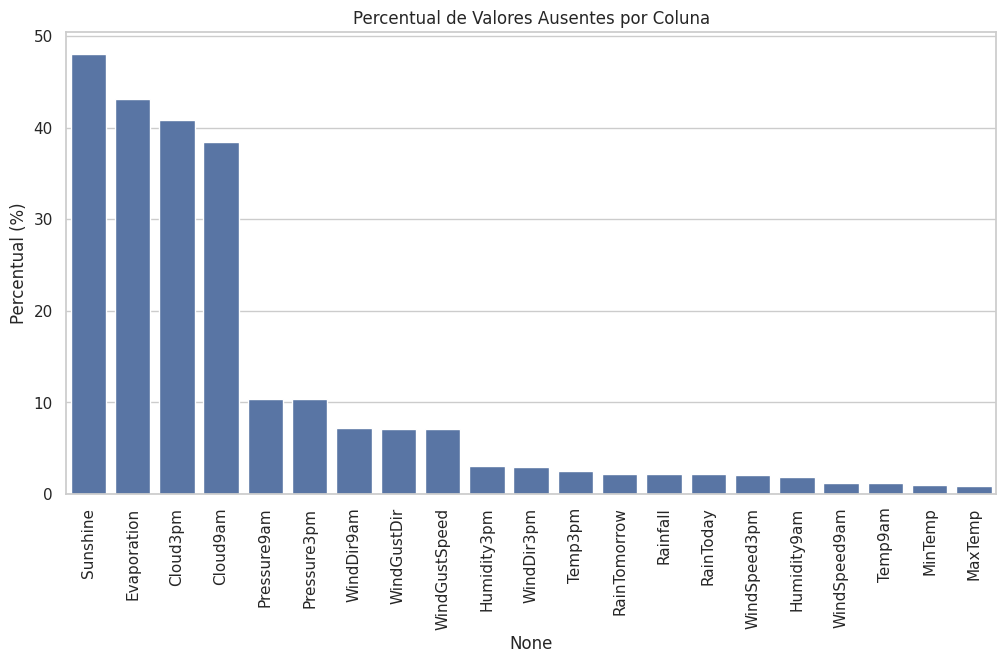

In [ ]:
# Total de valores ausentes por coluna
missing = df.isnull().sum().sort_values(ascending=False)

# Percentual de valores ausentes
missing_percent = (missing / len(df)) * 100

# Mostrar somente colunas com valores ausentes
missing_df = pd.DataFrame({'Total Ausentes': missing, 'Percentual (%)': missing_percent})
missing_df = missing_df[missing_df['Total Ausentes'] > 0]
print(missing_df)

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percentual (%)'])
plt.xticks(rotation=90)
plt.title('Percentual de Valores Ausentes por Coluna')
plt.show()


Verificação de colunas irrelevantes ou redundantes

In [ ]:
# Colunas como 'Date' podem ser transformadas ou descartadas
print(df['Date'].head())

# Verificando se há apenas um valor em alguma coluna
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Coluna irrelevante (valor único): {col}")


0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object


Detecção de outliers em variáveis numéricas

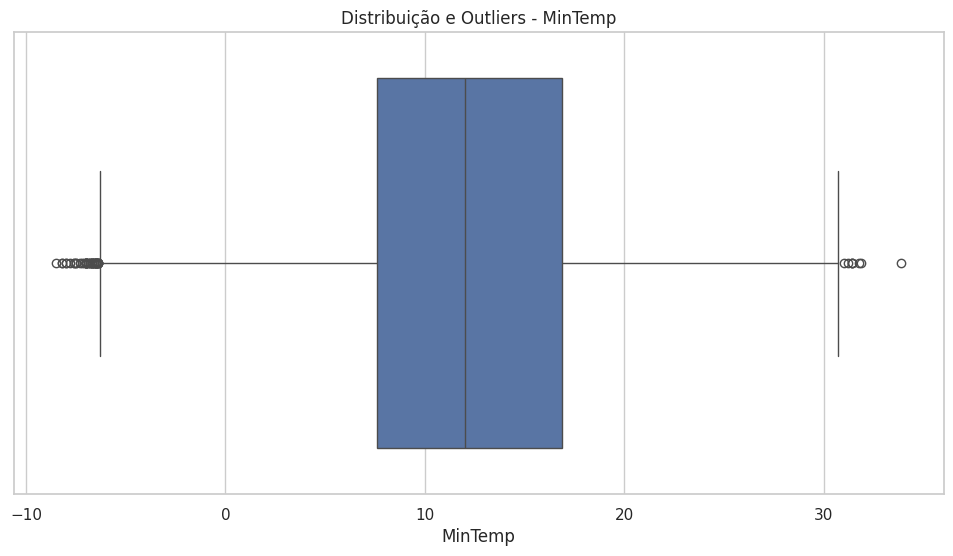

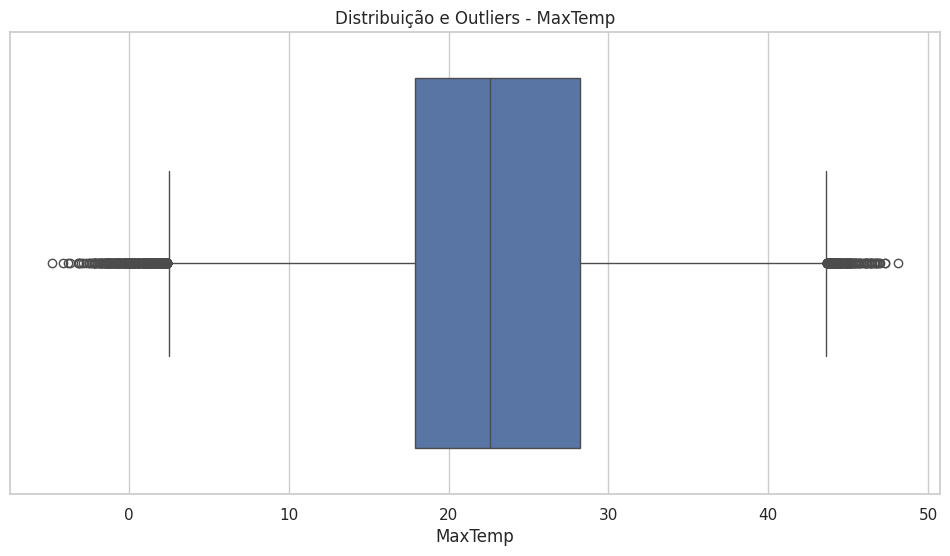

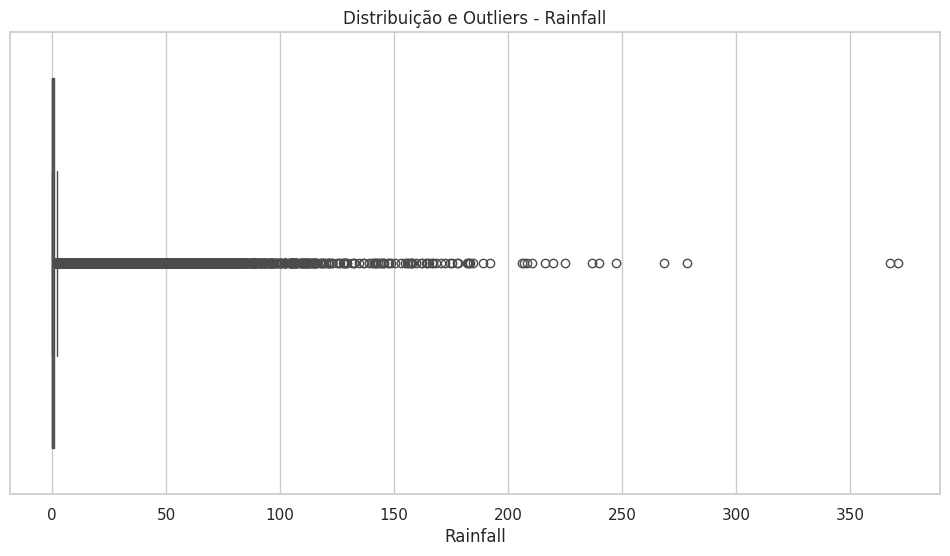

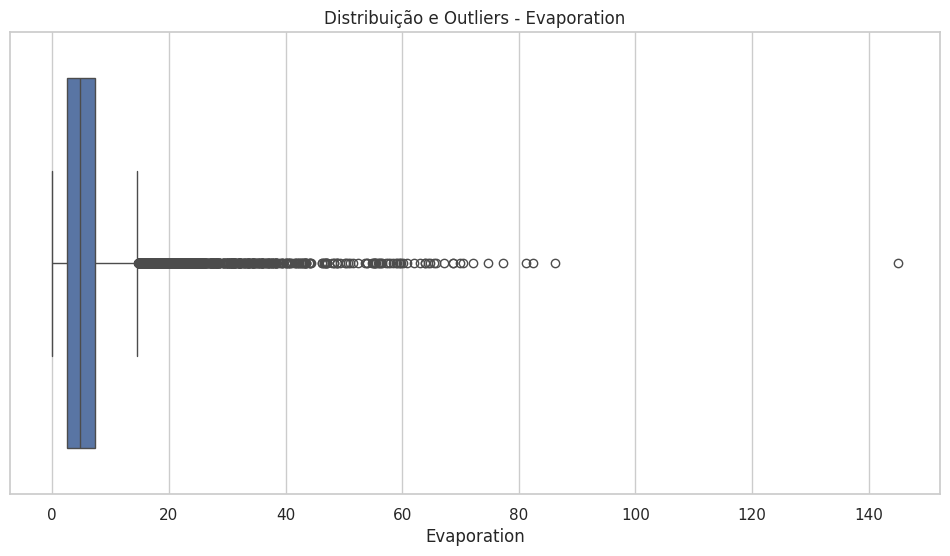

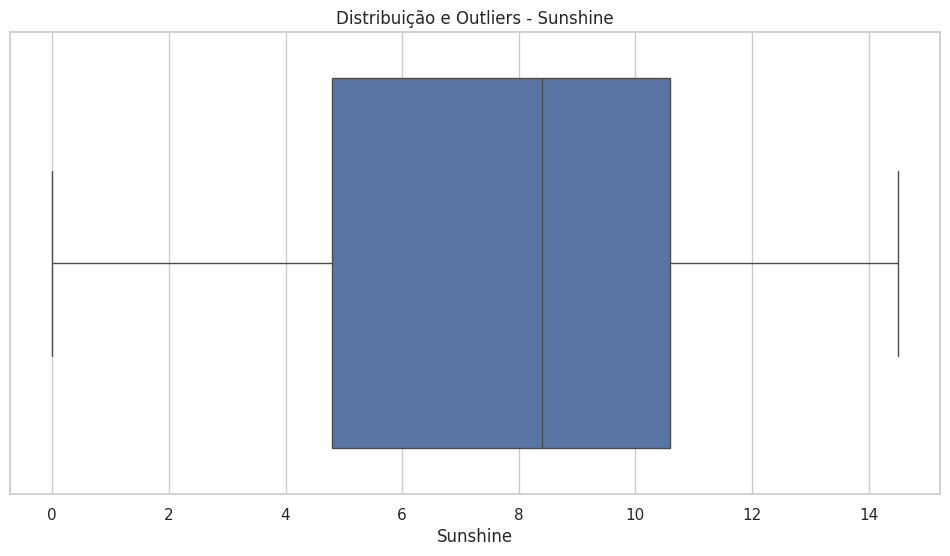

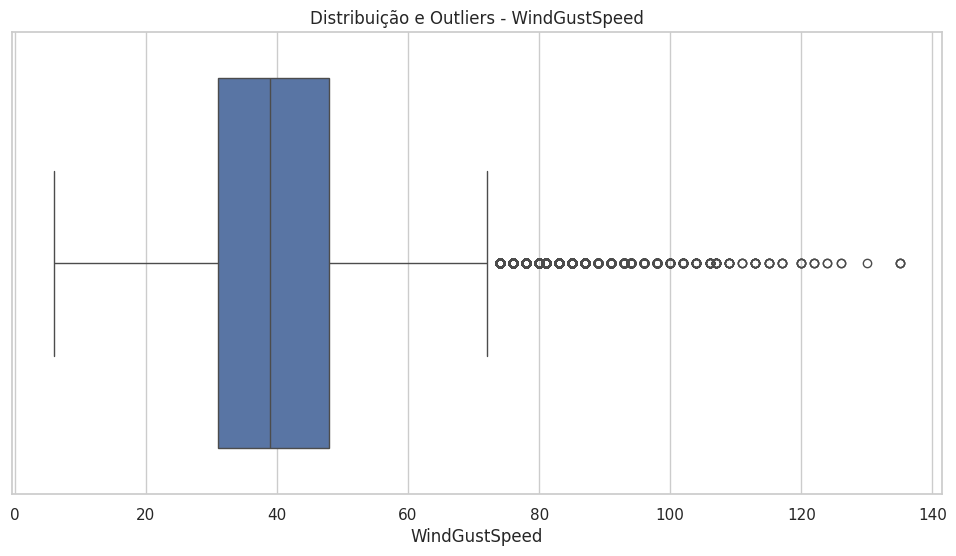

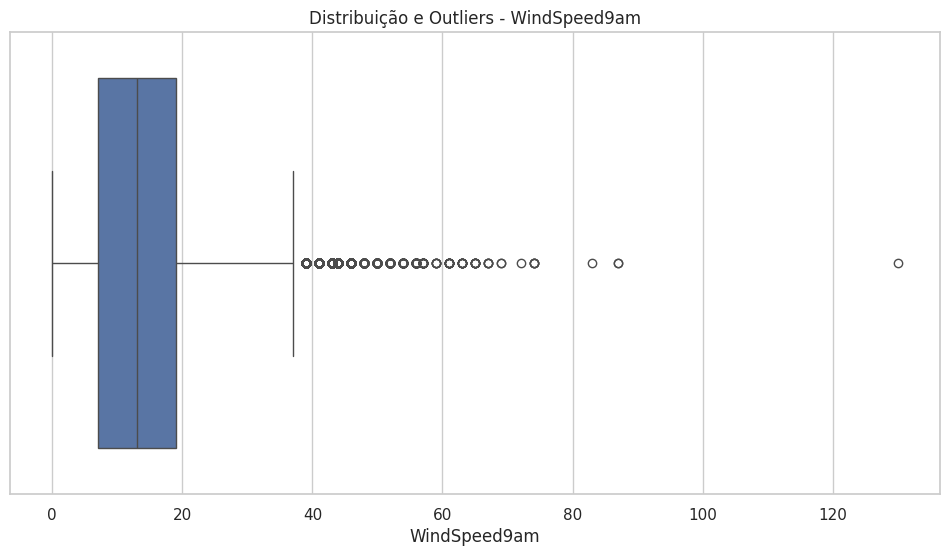

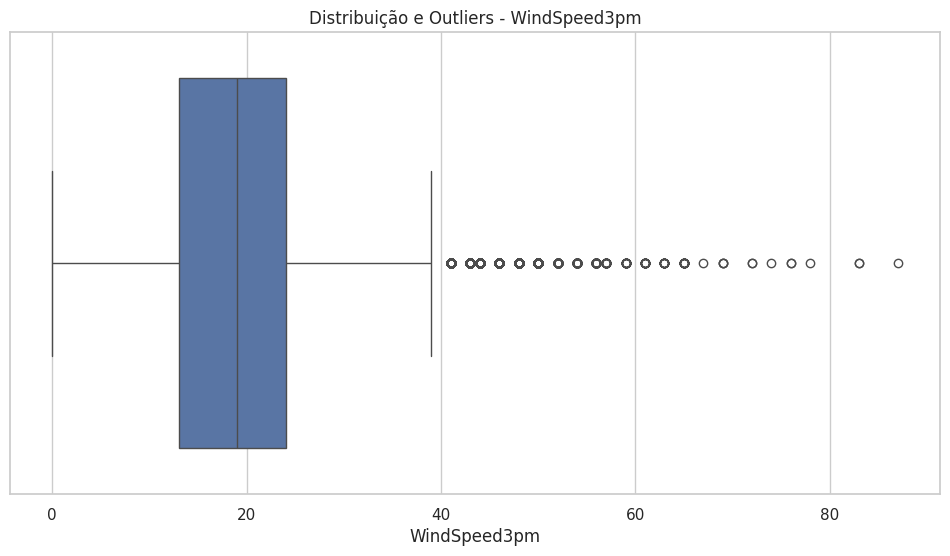

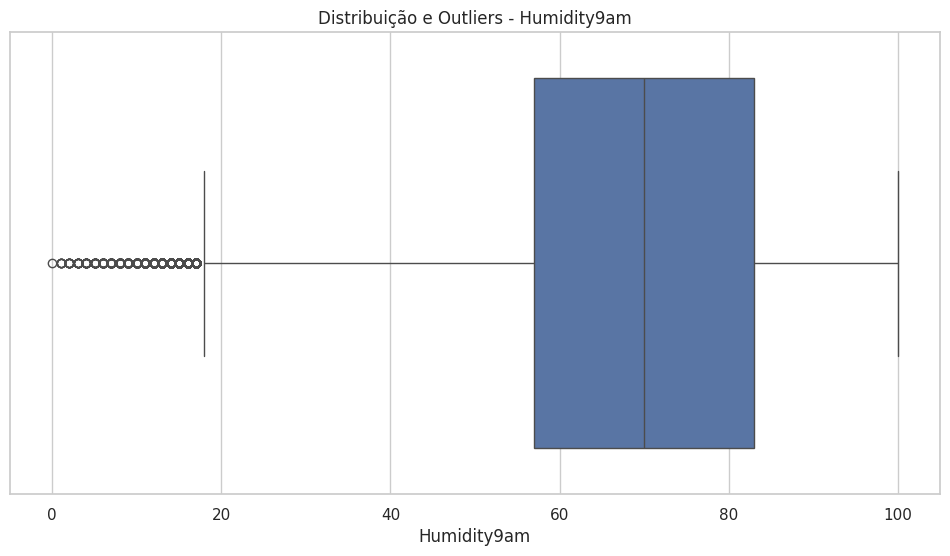

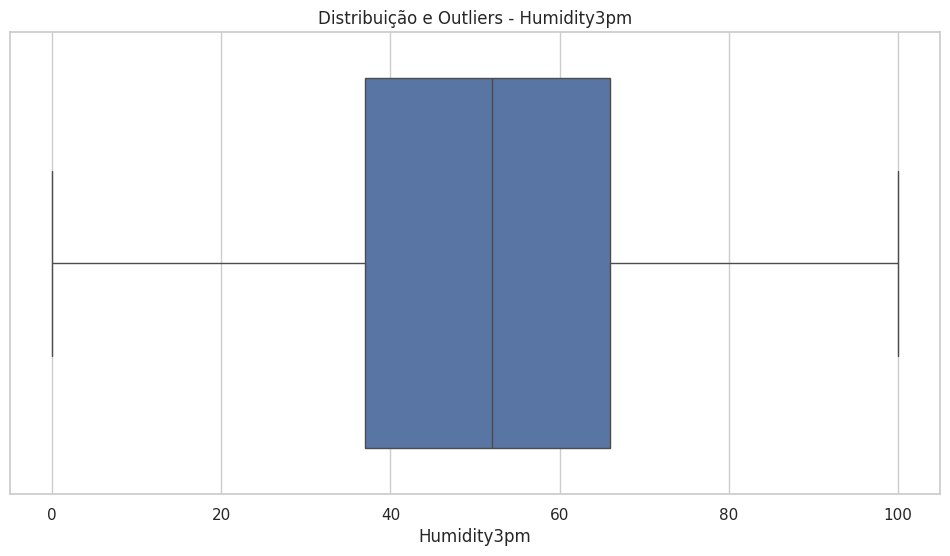

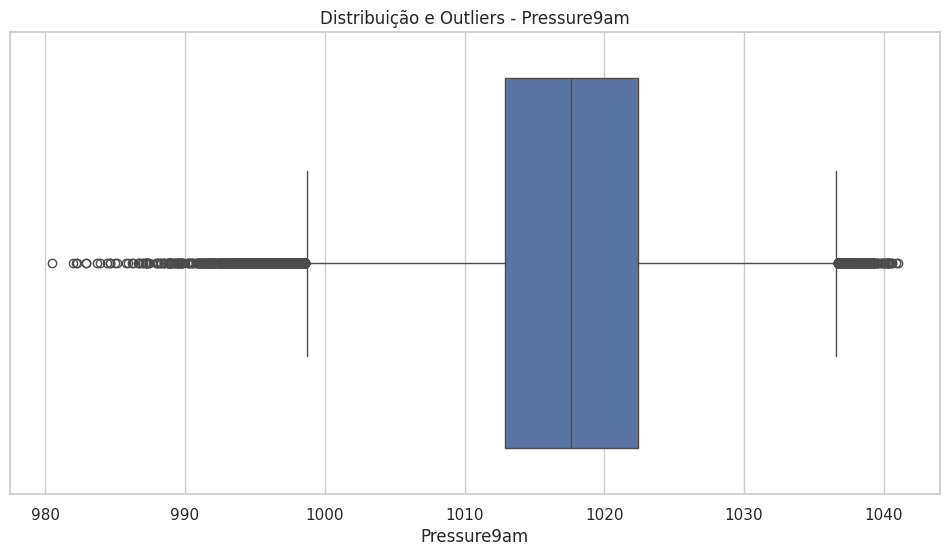

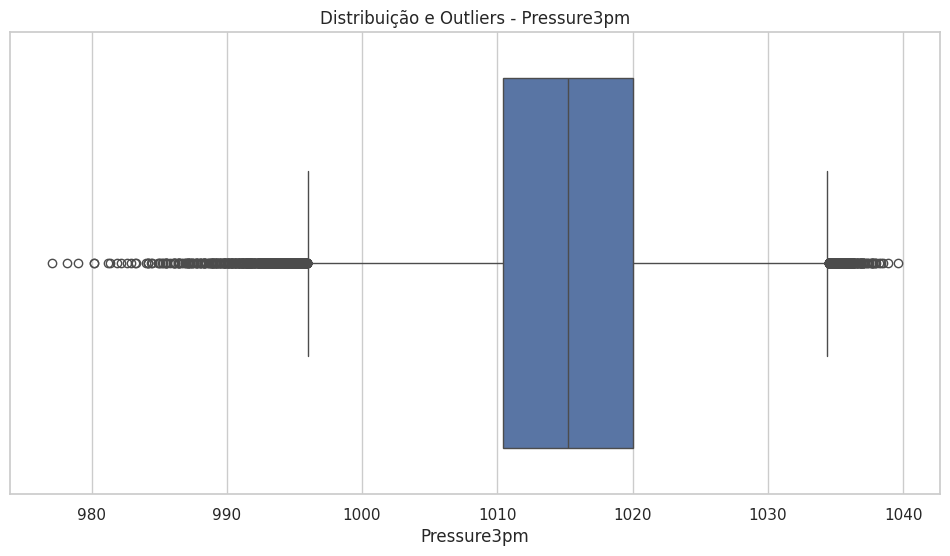

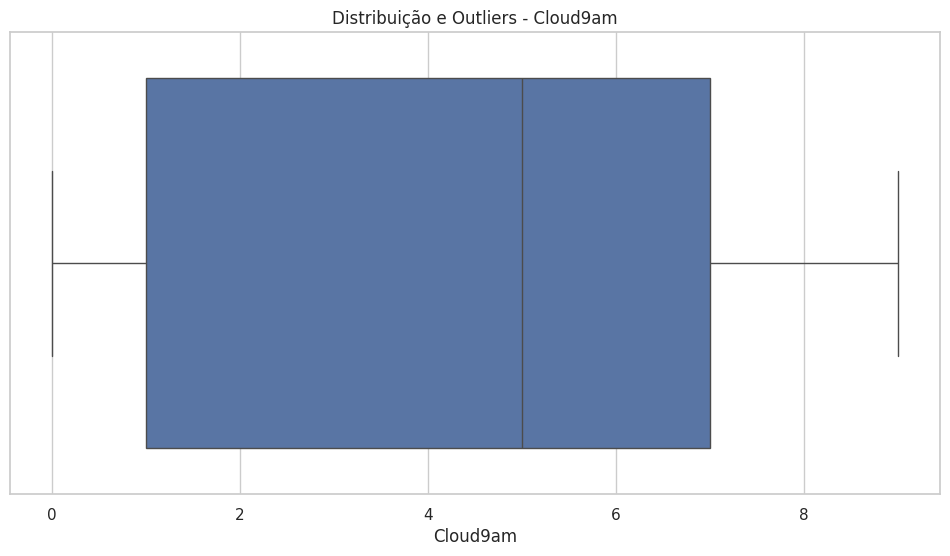

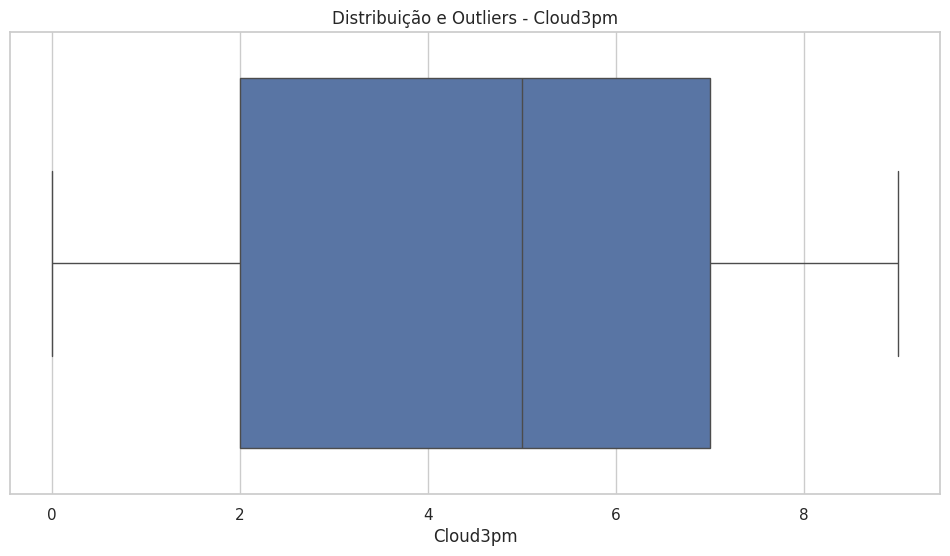

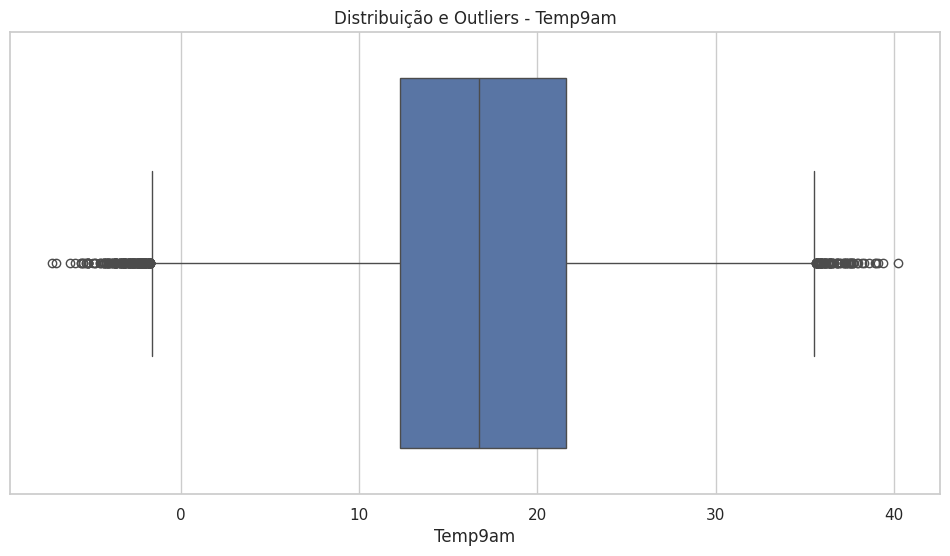

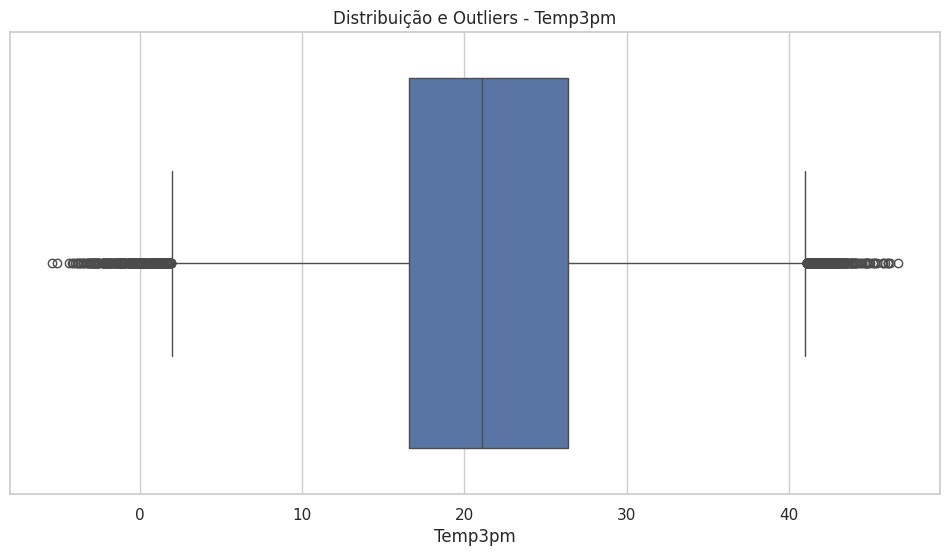

In [ ]:
# Boxplots para detectar outliers
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribuição e Outliers - {col}')
    plt.show()


Tratamento de valores ausentes

In [ ]:
# Remover colunas com mais de 30% de valores ausentes
limite = 0.3 * len(df)
df = df.dropna(thresh=limite, axis=1)

# Preenchendo colunas numéricas com mediana
for col in df.select_dtypes(include=['float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Preenchendo colunas categóricas com o valor mais frequente
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-7-3665307442.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-7-3665307442.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Conversão da coluna Date e variáveis categóricas

In [ ]:
# Extrair mês e ano da coluna Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])  # Podemos descartar a coluna original

# Codificação One-Hot nas variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificar a nova dimensão
print(f"Dimensão após codificação: {df_encoded.shape}")


Dimensão após codificação: (145460, 113)


Separar em X (features) e y (target), treino e teste

In [ ]:

X = df_encoded.drop(columns=['RainTomorrow_Yes'])  # Target é "RainTomorrow_Yes"
y = df_encoded['RainTomorrow_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


Treinar modelo Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Avaliação do modelo

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91     28396
        True       0.78      0.49      0.60      7969

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.85     36365



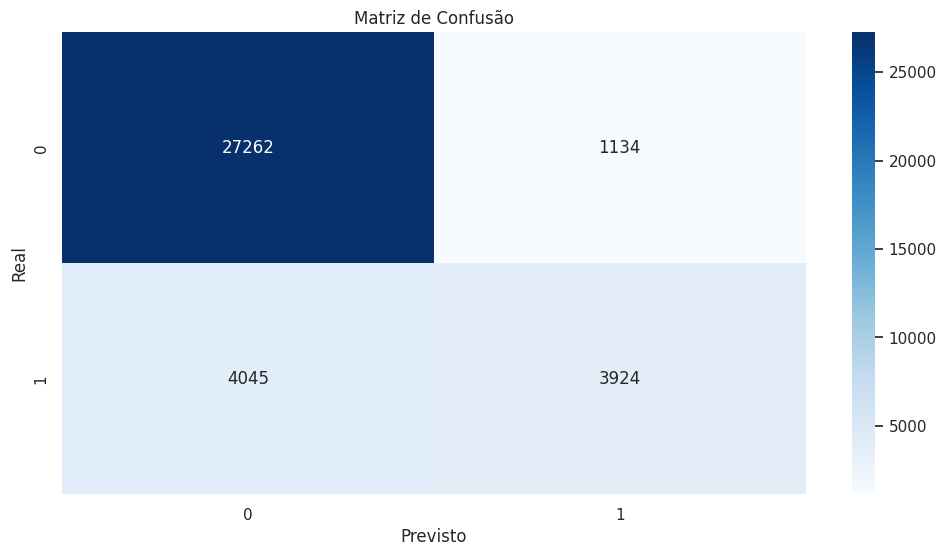

Acurácia: 85.76%


In [ ]:
# Relatório completo
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")

Ajuste de Hiperparâmetros com Validação Cruzada

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores hiperparâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Melhor score na validação cruzada (f1): 0.5927

Avaliação no conjunto de teste:
              precision    recall  f1-score   support

       False       0.87      0.96      0.91     28396
        True       0.78      0.49      0.60      7969

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.85     36365



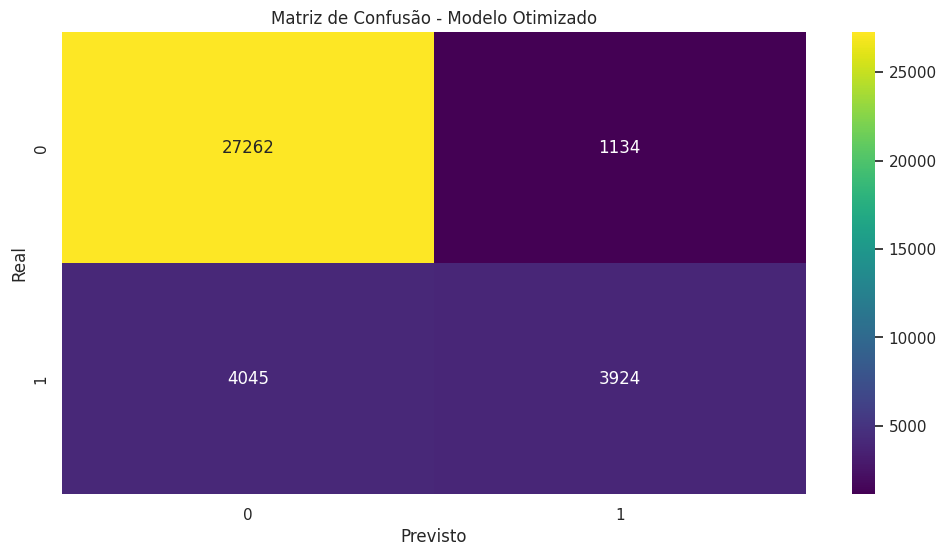

Acurácia: 85.76%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Grade otimizada
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

# 2. Classificador base
rf = RandomForestClassifier(random_state=42)

# 3. GridSearchCV focado em f1-score ou recall
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# 4. Treinamento com busca de hiperparâmetros
grid_search.fit(X_train, y_train)

# 5. Melhor modelo
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print(f"\nMelhor score na validação cruzada (f1): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

# 6. Avaliação no conjunto de teste
y_pred = best_model.predict(X_test)

print("\nAvaliação no conjunto de teste:")
print(classification_report(y_test, y_pred))

# 7. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusão - Modelo Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 8. Acurácia final
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")


Comparação com outros algoritmos

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

#Normalizar dados para o KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest (já treinado antes)
rf_model = best_model

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

def avaliar_modelo(nome, modelo, X_test_data, y_test_data):
    y_pred = modelo.predict(X_test_data)
    print(f"\n📊 Modelo: {nome}")
    print(classification_report(y_test_data, y_pred))
    print("Acurácia:", accuracy_score(y_test_data, y_pred))

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test_data, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC
    y_prob = modelo.predict_proba(X_test_data)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_data, y_prob)
    auc = roc_auc_score(y_test_data, y_prob)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {auc:.2f})')

    return auc


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Comparativo 3 modelos:


📊 Modelo: Random Forest
              precision    recall  f1-score   support

       False       0.87      0.96      0.91     28396
        True       0.78      0.49      0.60      7969

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.85     36365

Acurácia: 0.8575828406434759


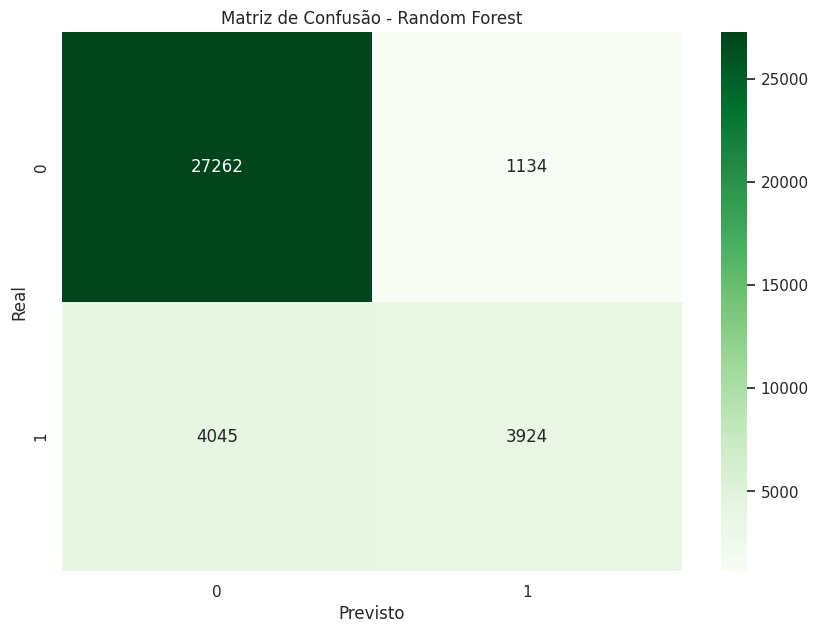


📊 Modelo: XGBoost
              precision    recall  f1-score   support

       False       0.88      0.95      0.91     28396
        True       0.74      0.55      0.63      7969

    accuracy                           0.86     36365
   macro avg       0.81      0.75      0.77     36365
weighted avg       0.85      0.86      0.85     36365

Acurácia: 0.858985288051698


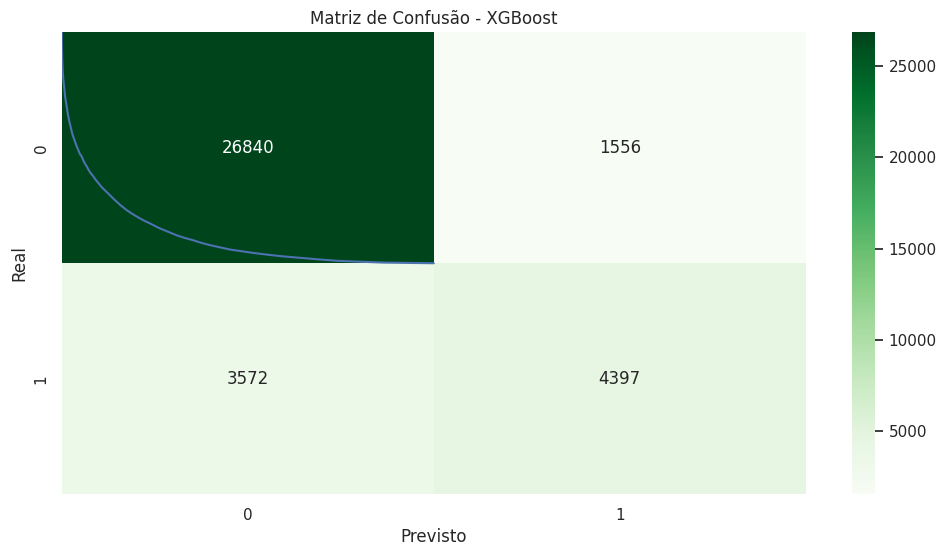


📊 Modelo: KNN
              precision    recall  f1-score   support

       False       0.83      0.95      0.89     28396
        True       0.65      0.31      0.42      7969

    accuracy                           0.81     36365
   macro avg       0.74      0.63      0.66     36365
weighted avg       0.79      0.81      0.79     36365

Acurácia: 0.8126495256427884


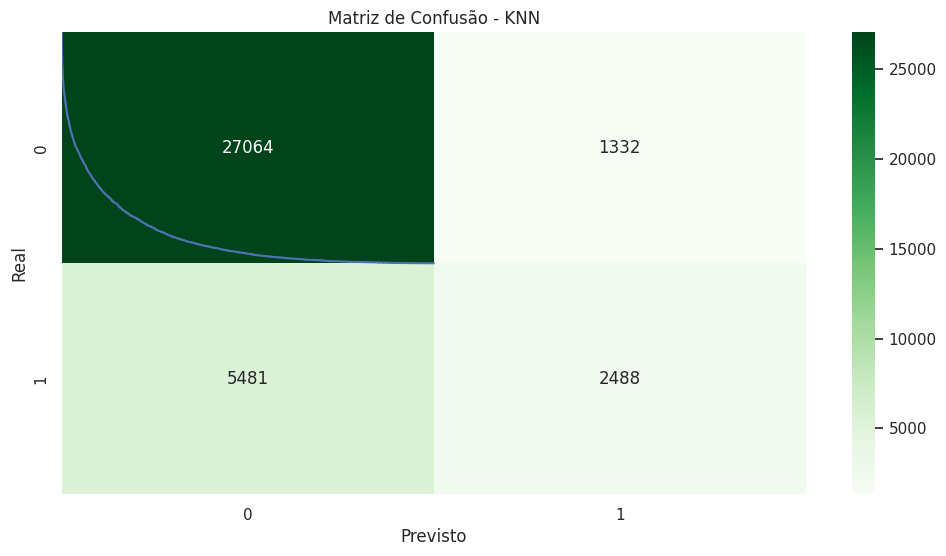

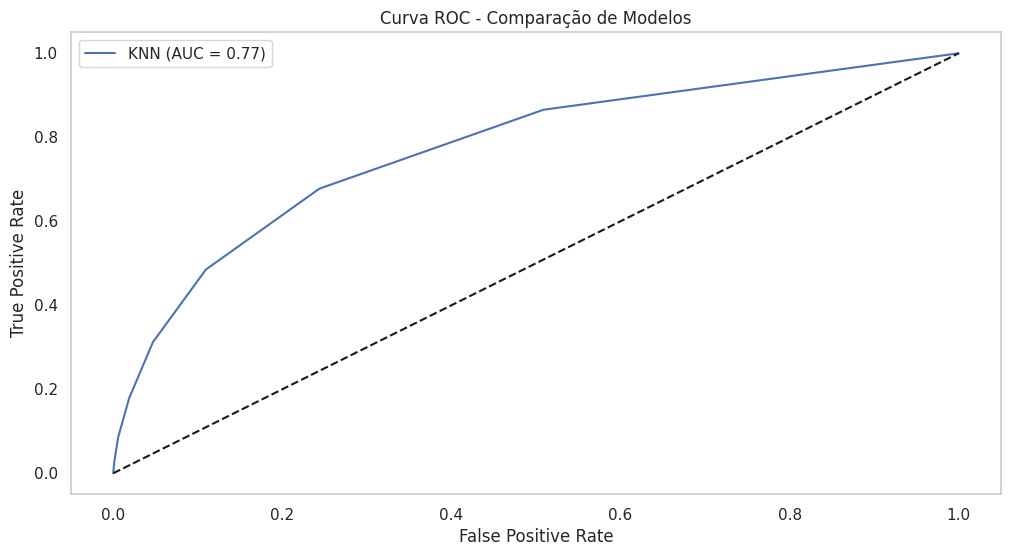


🔍 Comparação dos AUCs:
Random Forest AUC: 0.8826
XGBoost       AUC: 0.8894
KNN           AUC: 0.7745


In [ ]:
plt.figure(figsize=(10, 7))
auc_rf = avaliar_modelo("Random Forest", rf_model, X_test, y_test)
auc_xgb = avaliar_modelo("XGBoost", xgb_model, X_test, y_test)
auc_knn = avaliar_modelo("KNN", knn_model, X_test_scaled, y_test)

# Mostrar todas as curvas ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend()
plt.grid()
plt.show()

# Resumo dos AUCs
print("\n🔍 Comparação dos AUCs:")
print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"XGBoost       AUC: {auc_xgb:.4f}")
print(f"KNN           AUC: {auc_knn:.4f}")


Redução de dimensionalidade XGBOOST

PCA

🔍 PCA reduziu de 112 para 91 componentes principais.
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:29:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Melhores hiperparâmetros:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

F1-Score: 0.5704
Recall: 0.4738
Acurácia: 84.36%

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.90     28396
        True       0.72      0.47      0.57      7969

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365



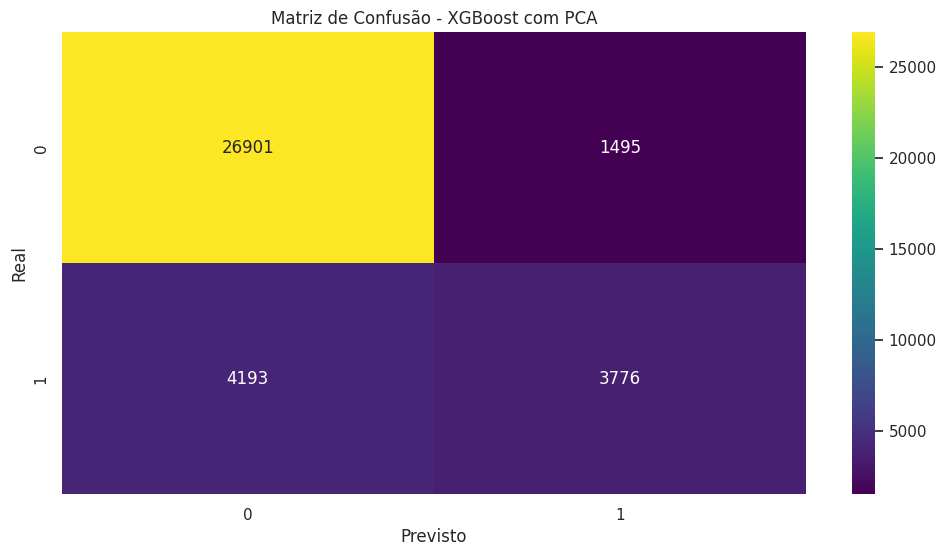

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicação do PCA (mantendo 95% da variância)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"🔍 PCA reduziu de {X_train.shape[1]} para {X_train_pca.shape[1]} componentes principais.")

# 3. Definir e ajustar modelo XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_pca, y_train)

# 4. Avaliação
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_pca)

print("\n✅ Melhores hiperparâmetros:")
print(grid_search.best_params_)

print(f"\nF1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusão - XGBoost com PCA")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


LDA

🔍 LDA reduziu de 112 para 1 componente(s).
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Melhores hiperparâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

F1-Score: 0.5977
Recall: 0.5119
Acurácia: 84.90%

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.94      0.91     28396
        True       0.72      0.51      0.60      7969

    accuracy                           0.85     36365
   macro avg       0.80      0.73      0.75     36365
weighted avg       0.84      0.85      0.84     36365



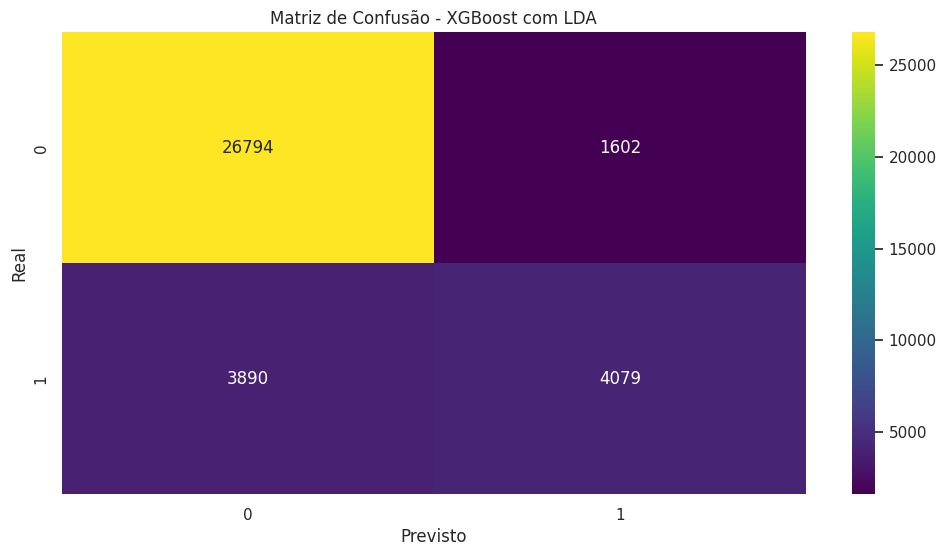

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicação do LDA (supervisionado)
lda = LDA(n_components=1)  # para 2 classes
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"🔍 LDA reduziu de {X_train.shape[1]} para {X_train_lda.shape[1]} componente(s).")

# 3. Modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 4. Grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# 5. GridSearchCV com validação cruzada
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_lda, y_train)

# 6. Avaliação
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_lda)

print("\n✅ Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print(f"\nF1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Matriz de Confusão - XGBoost com LDA")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
